# Data Load

In [1]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

#Download data from drive and rename to data.zip inside tmp folder

In [3]:

!wget --no-check-certificate \
    "https://drive.google.com/u/0/uc?id=16S4zn1SMGOKvoRC1bn5LCQn1xmPvEH58&export=download&confirm=t" \
    -O "/tmp/data.zip"

local_zip = '/tmp/data.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

--2022-06-10 04:15:31--  https://drive.google.com/u/0/uc?id=16S4zn1SMGOKvoRC1bn5LCQn1xmPvEH58&export=download&confirm=t
Resolving drive.google.com (drive.google.com)... 74.125.142.101, 74.125.142.138, 74.125.142.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.142.101|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://drive.google.com/uc?id=16S4zn1SMGOKvoRC1bn5LCQn1xmPvEH58&export=download&confirm=t [following]
--2022-06-10 04:15:31--  https://drive.google.com/uc?id=16S4zn1SMGOKvoRC1bn5LCQn1xmPvEH58&export=download&confirm=t
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-6c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/j97bs3ufok9a16lpne6p82fcasif0kbg/1654834500000/10501907559150766263/*/16S4zn1SMGOKvoRC1bn5LCQn1xmPvEH58?e=download [following]
--2022-06-10 04:15:31--  https://doc-0s-6c-docs.googleusercontent.com/docs/secur

### Labeling

In [4]:
root_dir = '/tmp/faces'

if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

def create_train_val_dirs(root_path):

  os.makedirs(root_path + '/training')
  os.makedirs(root_path + '/validation')
  os.makedirs(root_path + '/training/open-mouth')
  os.makedirs(root_path + '/training/puff-cheeck')
  os.makedirs(root_path + '/training/show-teeth')
  os.makedirs(root_path + '/training/smile')
  os.makedirs(root_path + '/training/sneer')
  
  os.makedirs(root_path + '/validation/open-mouth')
  os.makedirs(root_path + '/validation/puff-cheeck')
  os.makedirs(root_path + '/validation/show-teeth')
  os.makedirs(root_path + '/validation/smile')
  os.makedirs(root_path + '/validation/sneer')

  
try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [5]:
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/tmp/faces/training
/tmp/faces/validation
/tmp/faces/training/open-mouth
/tmp/faces/training/smile
/tmp/faces/training/sneer
/tmp/faces/training/show-teeth
/tmp/faces/training/puff-cheeck
/tmp/faces/validation/open-mouth
/tmp/faces/validation/smile
/tmp/faces/validation/sneer
/tmp/faces/validation/show-teeth
/tmp/faces/validation/puff-cheeck


In [7]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):

  files = []
  for path in os.listdir(SOURCE_DIR):
    if os.path.getsize(SOURCE_DIR + path) > 0:
      files.append(SOURCE_DIR + path)
    else:
      print(path+' is zero length, so ignoring.')


  random_trainfile = random.sample(files, int(SPLIT_SIZE*len(files)))

  for path in random_trainfile:
    copyfile(SOURCE_DIR + path[path.rfind('/')+1 : ], TRAINING_DIR + path[path.rfind('/')+1 : ])

  random_testingfiles = list(set(files)-set(random_trainfile))
  random_testingfile = random.sample(random_testingfiles, len(random_testingfiles))
  
  for path in random_testingfile:
    copyfile(SOURCE_DIR + path[path.rfind('/')+1 : ], VALIDATION_DIR + path[path.rfind('/')+1 : ])


In [9]:
om_dir = "/tmp/face/open-mouth/"
smile_dir = "/tmp/face/smile/"
puff_dir = "/tmp/face/puff-cheeks/"
show_dir = "/tmp/face/show-teeth/"
sneer_dir = "/tmp/face/sneer-on-one-side/"

TRAINING_DIR = "/tmp/faces/training/"
VALIDATION_DIR = "/tmp/faces/validation/"

TRAINING_SMILE_DIR = os.path.join(TRAINING_DIR, "smile/")
VALIDATION_SMILE_DIR = os.path.join(VALIDATION_DIR, "smile/")

TRAINING_sneer_DIR = os.path.join(TRAINING_DIR, "sneer/")
VALIDATION_sneer_DIR = os.path.join(VALIDATION_DIR, "sneer/")

TRAINING_show_DIR = os.path.join(TRAINING_DIR, "show-teeth/")
VALIDATION_show_DIR = os.path.join(VALIDATION_DIR, "show-teeth/")

TRAINING_puff_DIR = os.path.join(TRAINING_DIR, "puff-cheeck/")
VALIDATION_puff_DIR = os.path.join(VALIDATION_DIR, "puff-cheeck/")

TRAINING_open_DIR = os.path.join(TRAINING_DIR, "open-mouth/")
VALIDATION_open_DIR = os.path.join(VALIDATION_DIR, "open-mouth/")

if len(os.listdir(TRAINING_SMILE_DIR)) > 0:
  for file in os.scandir(TRAINING_SMILE_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_sneer_DIR)) > 0:
  for file in os.scandir(TRAINING_sneer_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_show_DIR)) > 0:
  for file in os.scandir(TRAINING_show_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_puff_DIR)) > 0:
  for file in os.scandir(TRAINING_puff_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_open_DIR)) > 0:
  for file in os.scandir(TRAINING_open_DIR):
    os.remove(file.path)


if len(os.listdir(VALIDATION_SMILE_DIR)) > 0:
  for file in os.scandir(VALIDATION_SMILE_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_sneer_DIR)) > 0:
  for file in os.scandir(VALIDATION_sneer_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_show_DIR)) > 0:
  for file in os.scandir(VALIDATION_show_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_puff_DIR)) > 0:
  for file in os.scandir(VALIDATION_puff_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_open_DIR)) > 0:
  for file in os.scandir(VALIDATION_open_DIR):
    os.remove(file.path)

split_size = .8

split_data(om_dir, TRAINING_open_DIR, VALIDATION_open_DIR, split_size)
split_data(smile_dir, TRAINING_SMILE_DIR, VALIDATION_SMILE_DIR, split_size)
split_data(puff_dir, TRAINING_puff_DIR, VALIDATION_puff_DIR, split_size)
split_data(show_dir, TRAINING_show_DIR, VALIDATION_show_DIR, split_size)
split_data(sneer_dir, TRAINING_sneer_DIR, VALIDATION_sneer_DIR, split_size)

In [10]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):

  train_datagen = ImageDataGenerator(rescale=1/255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=25,
                                                      class_mode='categorical',
                                                      shuffle=True,
                                                      target_size=(256, 256))

  validation_datagen = ImageDataGenerator(rescale=1/255)

  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=100,
                                                                class_mode='categorical',
                                                                shuffle=True,
                                                                target_size=(256, 256))
  return train_generator, validation_generator

In [11]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 720 images belonging to 5 classes.
Found 180 images belonging to 5 classes.


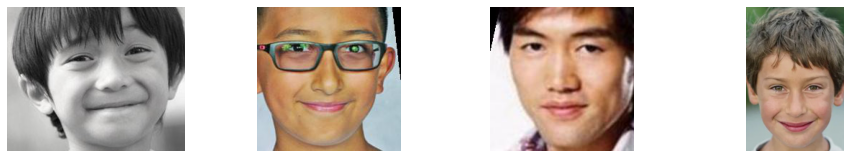

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt                                                     #Mengimpor modul matplotlib
import matplotlib.image as mpimg

nrows = 3                                                                           #Jumlah baris tampilan gambar
ncols = 4                                                                           #Jumlah baris tampilan gambar

pic_index = 0                                                                        #Index awal untuk iterasi gambar

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 3)                                           #Mengatur gambar output matplotlib, dan ukurannya agar menjadi 4*6 gambar
                                   
file_smile = os.listdir(TRAINING_SMILE_DIR)                                           #Mendaftar file di dalam folder


pic_index += 4                                                                      #Index tambah bertambah 4 setiap baris
gbr_tampil_smile  = [os.path.join(TRAINING_SMILE_DIR, fname)                              #Menampilkan gambar
                      for fname in file_smile[pic_index-4:pic_index]]

for i, img_path in enumerate(gbr_tampil_smile):
  sp = plt.subplot(nrows, ncols, i + 1)                                             #Mengatur subplot; indeks subplot dimulai dari 1
  sp.axis('Off')                                                                    #Tidak menampilkan Gridlines

  img = mpimg.imread(img_path)
  plt.imshow(img)
  


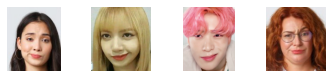

In [15]:
file_smirk = os.listdir(TRAINING_sneer_DIR)                                           #Mendaftar file di dalam folder sneer

pic_index += 4                                                                      #Index tambah bertambah 4 setiap baris
gbr_tampil_smile  = [os.path.join(TRAINING_sneer_DIR, fname)                              #Menampilkan gambar 
                      for fname in file_smirk[pic_index-4:pic_index]]

for i, img_path in enumerate(gbr_tampil_smile):
  sp = plt.subplot(nrows, ncols, i + 1)                                             #Mengatur subplot; indeks subplot dimulai dari 1
  sp.axis('Off')                                                                    #Tidak menampilkan Gridlines

  img = mpimg.imread(img_path)
  plt.imshow(img)

In [17]:
from tensorflow.keras.optimizers import Adam

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.82):
      print("\nReached 0.82 % val accuracy so cancelling training!")
      self.model.stop_training = True

#Manual Model

In [20]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop

In [27]:
def create_model():
  model = tf.keras.models.Sequential([ 
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Dropout(rate=0.01),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Dropout(rate=0.01),

    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Dropout(rate=0.01),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
  ])

  model.compile(optimizer=RMSprop(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy']) 
  
  return model


In [28]:
model = create_model()
callbacks = myCallback()

history = model.fit(train_generator,
                    steps_per_epoch = 5,
                    epochs=50,
                    verbose=1,
                    validation_data=validation_generator,
                    callbacks=[callbacks])

Epoch 1/50
5/5 [==============================] - 5s 844ms/step - loss: 24.7359 - accuracy: 0.2400 - val_loss: 1.6104 - val_accuracy: 0.2000
Epoch 2/50
5/5 [==============================] - 4s 710ms/step - loss: 1.6288 - accuracy: 0.1440 - val_loss: 1.6102 - val_accuracy: 0.2000
Epoch 3/50
5/5 [==============================] - 4s 711ms/step - loss: 1.6186 - accuracy: 0.1760 - val_loss: 1.6099 - val_accuracy: 0.2000
Epoch 4/50
5/5 [==============================] - 4s 746ms/step - loss: 1.6043 - accuracy: 0.1600 - val_loss: 1.6103 - val_accuracy: 0.2056
Epoch 5/50
5/5 [==============================] - 4s 724ms/step - loss: 1.6162 - accuracy: 0.2000 - val_loss: 1.6120 - val_accuracy: 0.1944
Epoch 6/50
5/5 [==============================] - 3s 699ms/step - loss: 1.7914 - accuracy: 0.1833 - val_loss: 1.6094 - val_accuracy: 0.2000
Epoch 7/50
5/5 [==============================] - 4s 741ms/step - loss: 1.6199 - accuracy: 0.2000 - val_loss: 1.6097 - val_accuracy: 0.1944
Epoch 8/50
5/5 [===

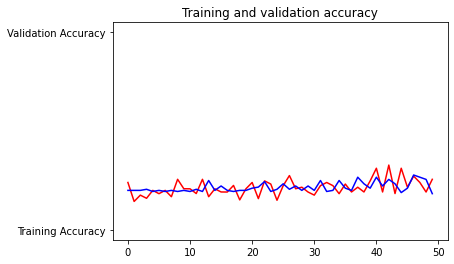

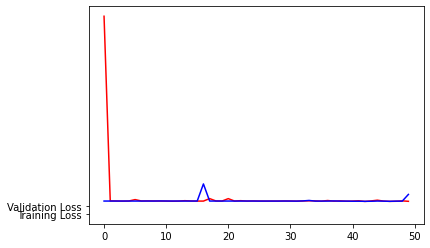

In [31]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

#Transfer learning using pre-trained model inceptionv3


In [32]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2022-06-10 04:32:10--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.135.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.135.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   119MB/s    in 0.7s    

2022-06-10 04:32:11 (119 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [38]:
from tensorflow.keras import layers

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = tf.keras.applications.inception_v3.InceptionV3(input_shape = (256, 256, 3), 
                                include_top = False, 
                                weights = 'imagenet')

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False

87924736/87910968 [==============================] - 0s 0us/step


In [39]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_198 (Conv2D)            (None, 127, 127, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_188 (Batch  (None, 127, 127, 32  96         ['conv2d_198[0][0]']             
 Normalization)                 )                                                      

In [40]:
last_layer = pre_trained_model.get_layer('mixed9')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 6, 6, 2048)


In [58]:
from tensorflow.keras import Model

x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)                  
x = tf.keras.layers.Dense  (5, activation='softmax')(x)           

model = Model(pre_trained_model.input, x) 

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_198 (Conv2D)            (None, 127, 127, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_188 (Batch  (None, 127, 127, 32  96         ['conv2d_198[0][0]']             
 Normalization)                 )                                                             

In [59]:
# Set the training parameters
model.compile(optimizer = Adam(learning_rate=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [60]:
tf.keras.backend.clear_session()

In [61]:
callbacks = myCallback()

history = model.fit(
            train_generator,
                    steps_per_epoch = 5,
                    epochs=50,
                    verbose=1,
                    validation_data=validation_generator,
                    callbacks=[callbacks]
                    )

Epoch 1/50
5/5 [==============================] - 15s 2s/step - loss: 1.6489 - accuracy: 0.2750 - val_loss: 1.2889 - val_accuracy: 0.5111
Epoch 2/50
5/5 [==============================] - 3s 638ms/step - loss: 1.4290 - accuracy: 0.4500 - val_loss: 1.3495 - val_accuracy: 0.4667
Epoch 3/50
5/5 [==============================] - 3s 645ms/step - loss: 1.2967 - accuracy: 0.4720 - val_loss: 1.1855 - val_accuracy: 0.5167
Epoch 4/50
5/5 [==============================] - 3s 649ms/step - loss: 1.1378 - accuracy: 0.5200 - val_loss: 1.1125 - val_accuracy: 0.5667
Epoch 5/50
5/5 [==============================] - 3s 638ms/step - loss: 0.9825 - accuracy: 0.5840 - val_loss: 1.0308 - val_accuracy: 0.5833
Epoch 6/50
5/5 [==============================] - 3s 659ms/step - loss: 1.0606 - accuracy: 0.6080 - val_loss: 0.9676 - val_accuracy: 0.6111
Epoch 7/50
5/5 [==============================] - 3s 638ms/step - loss: 0.9675 - accuracy: 0.6400 - val_loss: 0.9454 - val_accuracy: 0.6222
Epoch 8/50
5/5 [======

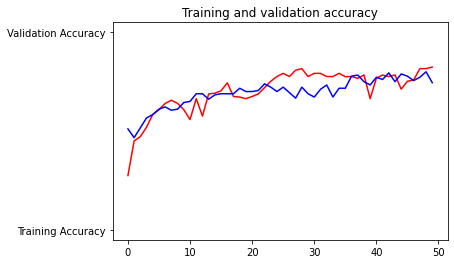

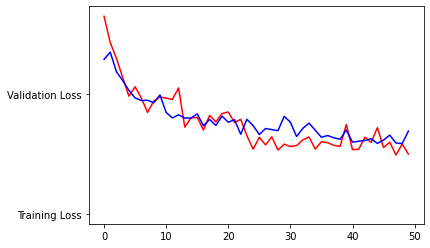

In [62]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

#Testing

Saving WhatsApp Image 2022-06-07 at 1.00.43 PM (1).jpeg to WhatsApp Image 2022-06-07 at 1.00.43 PM (1).jpeg
Saving WhatsApp Image 2022-06-07 at 1.00.43 PM (2).jpeg to WhatsApp Image 2022-06-07 at 1.00.43 PM (2).jpeg
Saving WhatsApp Image 2022-06-07 at 1.00.43 PM (3).jpeg to WhatsApp Image 2022-06-07 at 1.00.43 PM (3).jpeg
Saving WhatsApp Image 2022-06-07 at 1.00.43 PM.jpeg to WhatsApp Image 2022-06-07 at 1.00.43 PM.jpeg
Saving WhatsApp Image 2022-06-07 at 1.00.44 PM.jpeg to WhatsApp Image 2022-06-07 at 1.00.44 PM.jpeg


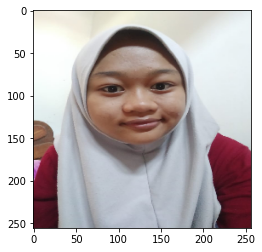

open-mouth: 0.22%
puff-cheeck: 12.75%
show-teeth: 3.70%
smile: 2.85%
sneer: 80.48%


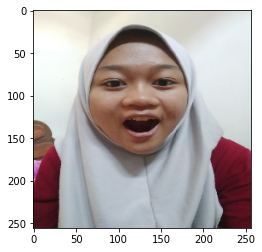

open-mouth: 1.62%
puff-cheeck: 9.66%
show-teeth: 2.76%
smile: 3.43%
sneer: 82.52%


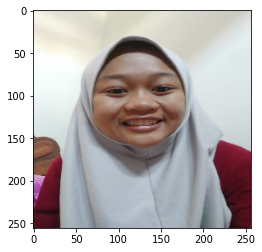

open-mouth: 1.68%
puff-cheeck: 6.85%
show-teeth: 8.62%
smile: 6.86%
sneer: 76.00%


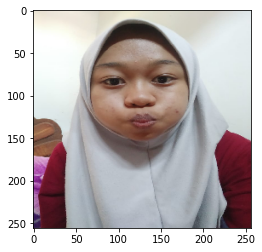

open-mouth: 0.39%
puff-cheeck: 55.68%
show-teeth: 1.66%
smile: 3.17%
sneer: 39.09%


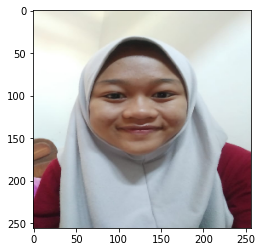

open-mouth: 0.40%
puff-cheeck: 11.13%
show-teeth: 5.08%
smile: 2.53%
sneer: 80.86%


In [65]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

labels = train_generator.class_indices.keys()
uploaded = files.upload()

for paths in uploaded.keys():

  path = paths
  img = image.load_img(path, target_size=(256, 256))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = tf.keras.applications.inception_v3.preprocess_input(x)

  images = np.vstack([x])
  proba = model.predict(images)[0]
  plt.imshow(img)
  plt.show()
  for (label, p) in zip(labels, proba):
    print("{}: {:.2f}%".format(label, p * 100))